<a href="https://colab.research.google.com/github/mathewbushuru/ml-curriculum-recommender/blob/main/ELEC_400M_Final_Report_Jupyter_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background

In 2019, I came up with an idea for an ed-tech project.  The initial idea was to participate in a hackathon focused on Social Ventures with two of my friends. After winning the hackathon, we started [Soma](https://www.somaoffline.com/) and decided to continue working on the project. We joined the social-venture stream of Entrepreneurship@UBC.

The idea was to provide access to online open-source educational materials to people who still don't have access to the internet. We built a prototype using Raspberry Pi and one of them is shown below.

 ![Soma server prototype](https://www.somaoffline.com/assets/images/soma-server.png)

The way it would work was we'd find open-source educational content online such as Khan Academy. We would then find or create offline copies of these websites which we would load on a content server. This content servers consist of cheap raspberry Pi running on a headless Linux distro that has been modified to be a server. When powered on, the content server works as a WiFi hotspot and 20 - 30 computers in a lab can connect to to as if it were the real internet. Only difference is the network consists of only educational materials we have added to these servers. We participated and won several more compettion such as The Resolution Project/MasterCard Foundation Global Social Venture Challenge, UBC's World's Challenge Challenge, among others.

In addition to the physical server, we built the Soma Academic Platform that would enable our users to access the various academic resources on our website (think of it like an offline Google). Since our main market was Kenya, one of the main objectives of the platform was to align the numerous content we had on our website to the Kenyan curriculum. 

This proved to be a difficult challenge. For example, one of the early products we built into the platform was for students to practise past national examination tests. An early version of this app can be viewed on this [GitHub repo](https://github.com/mathewbushuru/soma_platform_v0.2). We started with the Grade 8 national exams because it was an easier job from a coding point of view. This is because Grade 8 exams in Kenya are multiple choice so the time-consuming task was just inputing the data to the database and coding the solution. However, the grade 12 exams were more challenging since they are not multiple choice. This is where this machine learning project comes in

## Learning Equality

After working on Soma for a few months, we came across Learning Equality which was tackling a similar project but on a global scale. In fact, most of our content on Soma  at the moment is a Kenyan curriculum aligned version of Learning Equality's content.

Kolibri, Learning Equality's similar product, faces a problem similar to Soma but on a grander scale. This is because the content on the platform is organized according to the country it was designed for but every country has its own educational structures and objectives. As a result, it becomes a very time-consuming  and resource intensive process to sort this content when educators need to use these open-source learning materials in countries different from where they were created.

To tackle this problem, Learning Equality announced this  [Kaggle competition](https://www.kaggle.com/competitions/learning-equality-curriculum-recommendations/)

## Learning Equality Kaggle Competition - Curriculum Recommendations

The plan is to use machine learning techniques to create a tool that can automate the curriculum alignment process. When someone is curating content for a specific topic within some specific country's curriculum, they are presented with top recommendations of relevant content items drawn from the larger Kolibri library. [1] The [dataset](https://www.kaggle.com/competitions/learning-equality-curriculum-recommendations/data) provided is a 871 MB file containing thousands of correlations between the specific content items and topics.

The current approach to curriculum alignment requires domain expertise and it is neither scalable nor efficient. I decided to join this competition because of my interest in educational technology. I also had an internship in the past where I worked on recommender algorithms which might be useful for this competition. The timeline is shown below: 
- December 15, 2022 - Start Date.

- March 7, 2023 - Entry Deadline. You must accept the competition rules before this date in order to compete.

- March 7, 2023 - Team Merger Deadline. This is the last day participants may join or merge teams.

- March 14, 2023 - Final Submission Deadline.

The entirety of the curriculum recommendation project is beyond the scope of the ELEC 400M Final Project. However as part of it, I will do some explotary data analysis and data preprocessing. After that, I will use some data from class examples or `Scikit-learn` to work on a full related machine learning project. I hope to use the lessons gained from doing this to work on the Kaggle competition over the next few months. 

# Dataset

The Learning Equality dataset consists of K-12 educational materials organized into topic taxonomies. These educational materials are in diverse languages and wide range of topics, particularly in STEM (Science, Technology, Engineering and Mathematics).

As mentioned above, this data is from from Kolibri Studio. The plan is to make a  curricular alignment tool in which users can create their own *channel*, then build out a *topic tree* that represents a curriculum taxonomy or other hierarchical structure, and finally organize *content items* into these topics, by uploading their own content and/or importing existing materials from the Kolibri Content Library of Open Educational Resources

An example topic tree is
```
Secondary Education >> Ordinary Level >> Mathematics >> Further Learning >> Activities >> Trigonometry.
```
A leaf in this branch might then contain(or be correlated with) a content item such as a video titled `Polar Coordinates`. References [1]


In [29]:
import pandas as pd
import numpy as np

In [30]:
# Dataset is currently on Google Drive. 
# To rerun notebook, uncomment the read_csv lines of code below and read directly from your copy of dataset
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Access dataset [here](https://www.kaggle.com/competitions/learning-equality-curriculum-recommendations/data)

## Files and Fields 

### `topics.csv`

Contains row for each topic in the dataset. These topics are organized into "channels" with each channel containing a single "topic tree" (which can be traversed through the "parent" reference)
- `id` - A unique identifier for this topic.

- `title` - Title text for this topic.

- `description` - Description text (may be empty)

- `channel` - The channel (that is, topic tree) this topic is part of.

- `category` - Describes the origin of the topic.

> 1. `source` - Structure was given by original content creator (e.g. the topic tree as imported from Khan Academy). There are no topics in the test set with this category. 

> 2. `aligned` - Structure is from a national curriculum or other target taxonomy, with content aligned from multiple sources.

> 3. `supplemental` - This is a channel that has to some extent been aligned, with without the same level of granularity or fidelity as an aligned channel.


- `language` - Language code for the topic. May not always match apparent language of its title or description, but will always match the language of any associated content items.

- `parent` - The id of the topic that contains this topic, if any. This field if empty if the topic is the root node for its channel.

- `level` - The depth of this topic within its topic tree. Level 0 means it is a root node (and hence its title is the title of the channel).

- `has_content` - Whether there are content items correlated with this topic. Most content is correlated with leaf topics, but some non-leaf topics also have content correlations

In [31]:
topics_df = pd.read_csv("/content/drive/My Drive/A_ELEC_UBC/Year4/Elec400m/Final Report/Code/Data/topics.csv")
#topics_df = pd.read_csv("Code/Data/topics.csv")

In [32]:
topics_df.head(5)

,id,title,description,channel,category,level,language,parent,has_content
0,t_00004da3a1b2,Откриването на резисторите,"Изследване на материали, които предизвикват на...",000cf7,source,4,bg,t_16e29365b50d,True
1,t_000095e03056,Unit 3.3 Enlargements and Similarities,NaN,b3f329,aligned,2,en,t_aa32fb6252dc,False
2,t_00068291e9a4,Entradas e saídas de uma função,Entenda um pouco mais sobre funções.,8e286a,source,4,pt,t_d14b6c2a2b70,True
3,t_00069b63a70a,Transcripts,NaN,6e3ba4,source,3,en,t_4054df11a74e,True
4,t_0006d41a73a8,Графики на експоненциални функции (Алгебра 2 н...,Научи повече за графиките на сложните показате...,000cf7,source,4,bg,t_e2452e21d252,True


### `content.csv`

Contains a row for each content item in the dataset. Some content items may not be correlated with any topic.


- `id` - A unique identifier for this content item.

- `title` - Title text for this content item.

- `description` - Description text. May be empty.

- `language` - Language code representing the language of this content item.

- `kind` - Describes what format of content this item represents, as one of:

> 1. `document` (text is extracted from a PDF or EPUB file)

> 2. `video` (text is extracted from the subtitle file, if available)

> 3. `exercise` (text is extracted from questions/answers)

> 4. `audio` (no text)

> 5. `html5` (text is extracted from HTML source)

- `text` - Extracted text content, if available and if licensing permitted (around half of content items have text content).
- `copyright_holder` - If text was extracted from the content, indicates the owner of the copyright for that content. Blank for all test set items.
- `license` - If text was extracted from the content, the license under which that content was made available. Blank for all test set items.

In [33]:
content_df = pd.read_csv("/content/drive/My Drive/A_ELEC_UBC/Year4/Elec400m/Final Report/Code/Data/content.csv")
#content_df = pd.read_csv("Code/Data/content.csv")

In [34]:
content_df.head(5)

,id,title,description,kind,text,language,copyright_holder,license
0,c_00002381196d,"Sumar números de varios dígitos: 48,029+233,930","Suma 48,029+233,930 mediante el algoritmo está...",video,NaN,es,NaN,NaN
1,c_000087304a9e,Trovare i fattori di un numero,Sal trova i fattori di 120.\n\n,video,NaN,it,NaN,NaN
2,c_0000ad142ddb,Sumar curvas de demanda,Cómo añadir curvas de demanda\n\n,video,NaN,es,NaN,NaN
3,c_0000c03adc8d,Nado de aproximação,Neste vídeo você vai aprender o nado de aproxi...,document,\nNado de aproximação\nSaber nadar nas ondas ...,pt,Sikana Education,CC BY-NC-ND
4,c_00016694ea2a,geometry-m3-topic-a-overview.pdf,geometry-m3-topic-a-overview.pdf,document,Estándares Comunes del Estado de Nueva York\n\...,es,Engage NY,CC BY-NC-SA


### `correlations.csv`
The content items associated to topics in the training set. A single content item may be associated to more than one topic. In each row, we give a `topic_id` and a list of all associated `content_ids`. These comprise the targets of the training set.

In [35]:
correlations_df = pd.read_csv("/content/drive/My Drive/A_ELEC_UBC/Year4/Elec400m/Final Report/Code/Data/correlations.csv")
#correlations_df = pd.read_csv("Code/Data/correlations.csv")

In [36]:
correlations_df.head(3)

,topic_id,content_ids
0,t_00004da3a1b2,c_1108dd0c7a5d c_376c5a8eb028 c_5bc0e1e2cba0 c...
1,t_00068291e9a4,c_639ea2ef9c95 c_89ce9367be10 c_ac1672cdcd2c c...
2,t_00069b63a70a,c_11a1dc0bfb99


### `sample_submission.csv`
A submission file in the correct format.

In [37]:
sample_submission_df = pd.read_csv("/content/drive/My Drive/A_ELEC_UBC/Year4/Elec400m/Final Report/Code/Data/sample_submission.csv")
#sample_submission_df = pd.read_csv("Code/Data/sample_submission.csv")

In [38]:
sample_submission_df.head(3)

,topic_id,content_ids
0,t_00004da3a1b2,c_1108dd0c7a5d c_376c5a8eb028 c_5bc0e1e2cba0 c...
1,t_00068291e9a4,c_639ea2ef9c95 c_89ce9367be10 c_ac1672cdcd2c c...
2,t_00069b63a70a,c_11a1dc0bfb99


# Data Pre-processing

## Separate X (`content_ids`) from y(`topic_ids`)

In [39]:
# get topic_ids and their corresponding content_ids as numpy arrays
correlations_topic_ids = correlations_df.iloc[:,:-1].values
correlations_content_ids = correlations_df.iloc[:,1:2].values

In [40]:
len(correlations_content_ids)

61517

- Create a new dataset by creating a single row of each content_id and assign the corresponding topic id
- Since splitting all the content_ids into a dataset of its own takes too long, start with data with just the first 1000 rows

In [41]:
correlations_topic_ids = correlations_topic_ids[0:1000]
correlations_content_ids = correlations_content_ids[0:1000]

In [42]:
print(f"topic_ids:\n {correlations_topic_ids[0:5]}")
print(f"Corresponding content ids:\n {correlations_content_ids[0:5]}")

topic_ids:
 [['t_00004da3a1b2']
 ['t_00068291e9a4']
 ['t_00069b63a70a']
 ['t_0006d41a73a8']
 ['t_0008768bdee6']]
Corresponding content ids:
 [['c_1108dd0c7a5d c_376c5a8eb028 c_5bc0e1e2cba0 c_76231f9d0b5e']
 ['c_639ea2ef9c95 c_89ce9367be10 c_ac1672cdcd2c c_ebb7fdf10a7e']
 ['c_11a1dc0bfb99']
 ['c_0c6473c3480d c_1c57a1316568 c_5e375cf14c47 c_b972646631cb c_d7a0d7eaf799']
 ['c_34e1424229b4 c_7d1a964d66d5 c_aab93ee667f4']]


In [43]:
content_ids = np.array([[0]])
topic_ids = np.array([[0]])

i = 0
while i<len(correlations_topic_ids):
  topic_id = correlations_topic_ids[i][0]
  # print(topic_id)
  content_ids_string = correlations_content_ids[i][0] #string of space separated content ids
  content_ids_arr = content_ids_string.split(" ")
  j = 0
  while (j<len(content_ids_arr)):
    content_id = content_ids_arr[j]
    # print(content_id)
    content_ids = np.append(content_ids,np.array([[content_id]]),axis=0)  
    topic_ids = np.append(topic_ids,np.array([[topic_id]]),axis=0)
    j += 1
  i += 1

# remove the first zeros added when creating arrays
content_ids = content_ids[1:]
topic_ids = topic_ids[1:]

In [44]:
print(f"Content ids numpy array: \n{content_ids},\nTopic ids numpy array: \n{topic_ids}")

Content ids numpy array: 
[['c_1108dd0c7a5d']
 ['c_376c5a8eb028']
 ['c_5bc0e1e2cba0']
 ...
 ['c_9b6a3221cc9d']
 ['c_187f923aedef']
 ['c_d9f1eb259ff1']],
Topic ids numpy array: 
[['t_00004da3a1b2']
 ['t_00004da3a1b2']
 ['t_00004da3a1b2']
 ...
 ['t_045ed925d7eb']
 ['t_0460a35757fe']
 ['t_0460a35757fe']]


In [45]:
#Denote content_id as X and corresponding topic_ids as y 
X = content_ids    #independent variable array
y = topic_ids  #dependent variable array

In [46]:
X[0:5]

array([['c_1108dd0c7a5d'],
       ['c_376c5a8eb028'],
       ['c_5bc0e1e2cba0'],
       ['c_76231f9d0b5e'],
       ['c_639ea2ef9c95']], dtype='<U21')

In [47]:
y[0:5]

array([['t_00004da3a1b2'],
       ['t_00004da3a1b2'],
       ['t_00004da3a1b2'],
       ['t_00004da3a1b2'],
       ['t_00068291e9a4']], dtype='<U21')

## Data visualization


### Missing values

We are going to use the `Missingno` library to understand how sparse this dataset is. We'll reference this example to do this [2]

In [48]:
import missingno as msno 

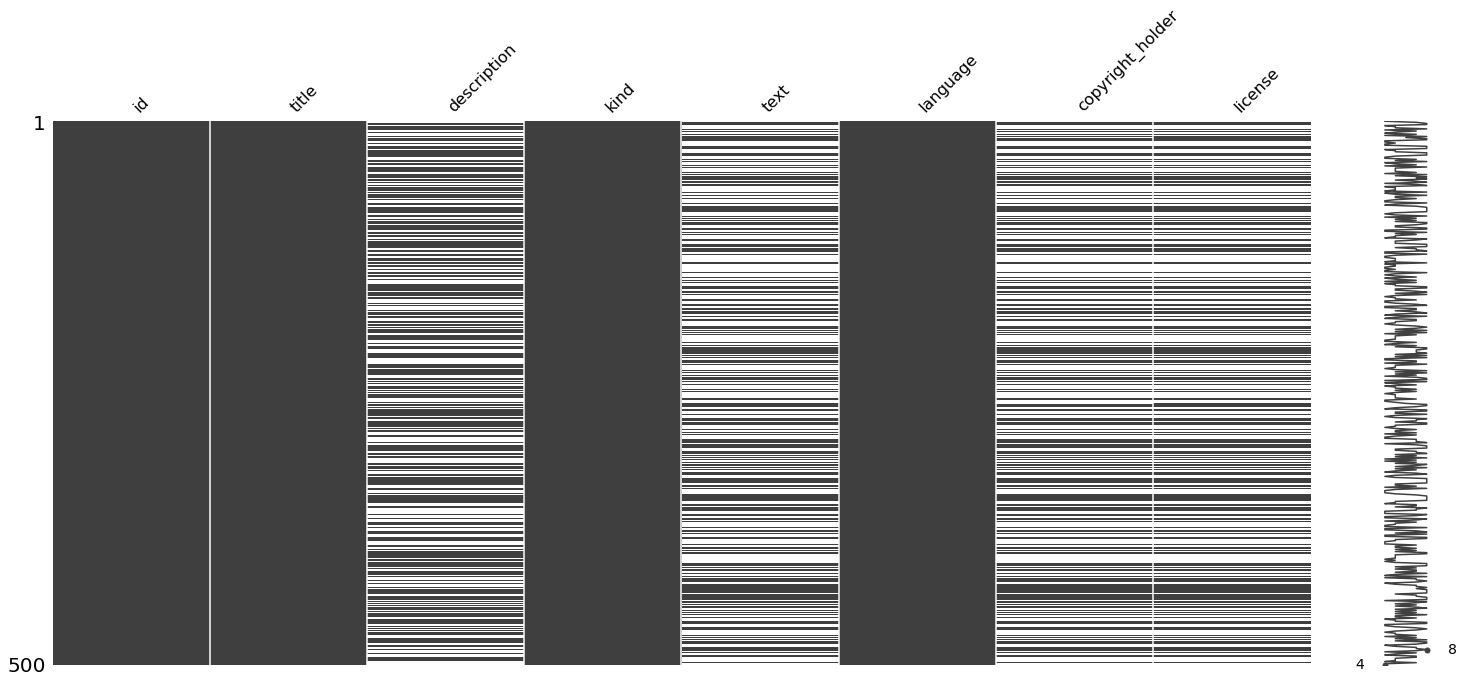

In [49]:
msno.matrix(content_df.sample(500))

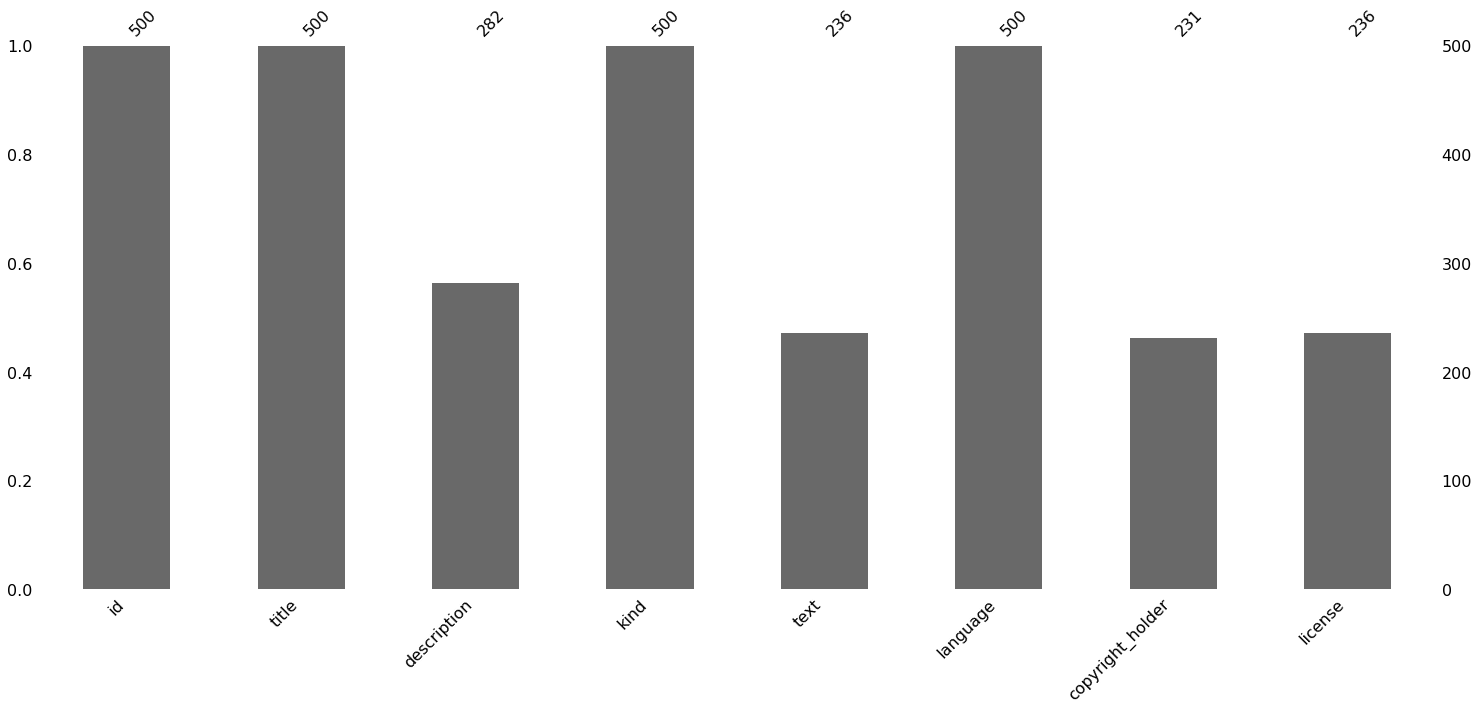

In [50]:
msno.bar(content_df.sample(500))

- For `content` data, we find that the `kind`,`language` and `title` columns are dense compared to the remaining sparse columns
- `kind` and `language` are each categorical hence they will make good features for a classification model 
- `title` will require a Natural Language Processing (NLP) model.
- Try making a classification model to start with then a Natural Language Processing model that looks for the relationship between words in `title`(and maybe the sparsely populated `description`, and `text`)

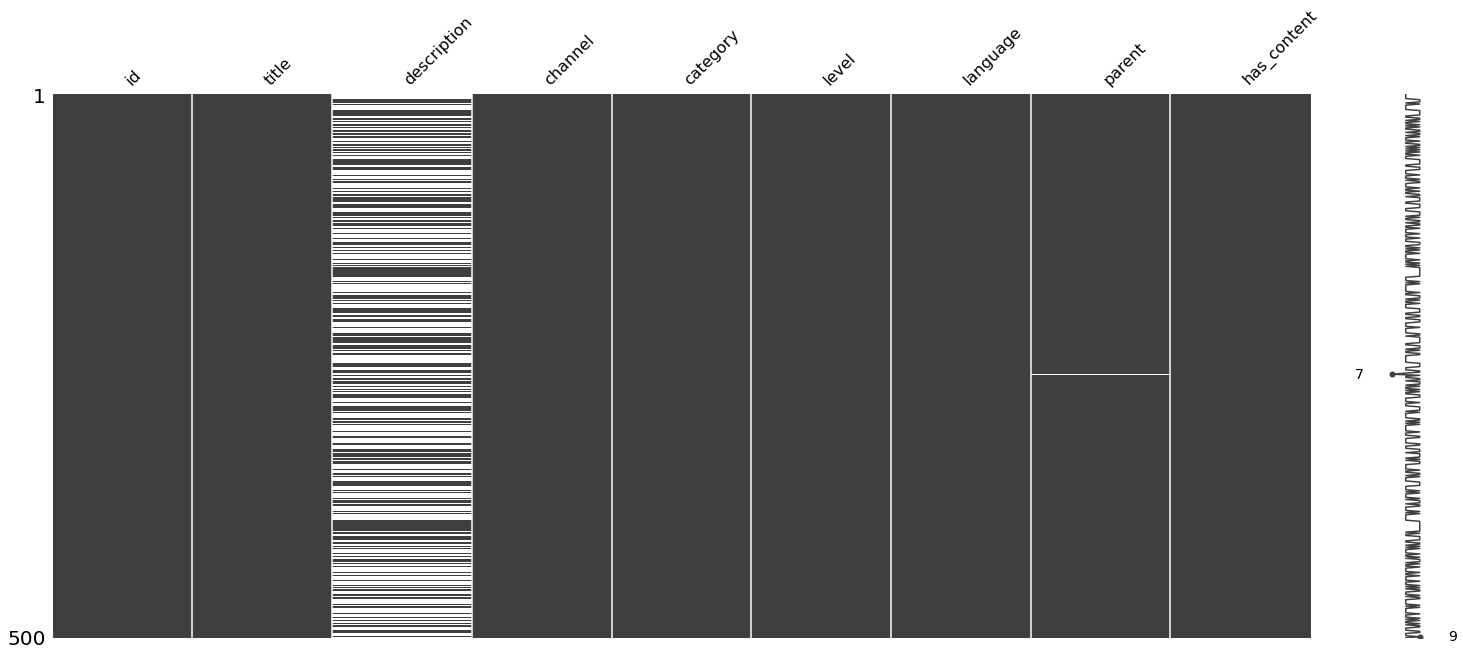

In [23]:
msno.matrix(topics_df.sample(500))

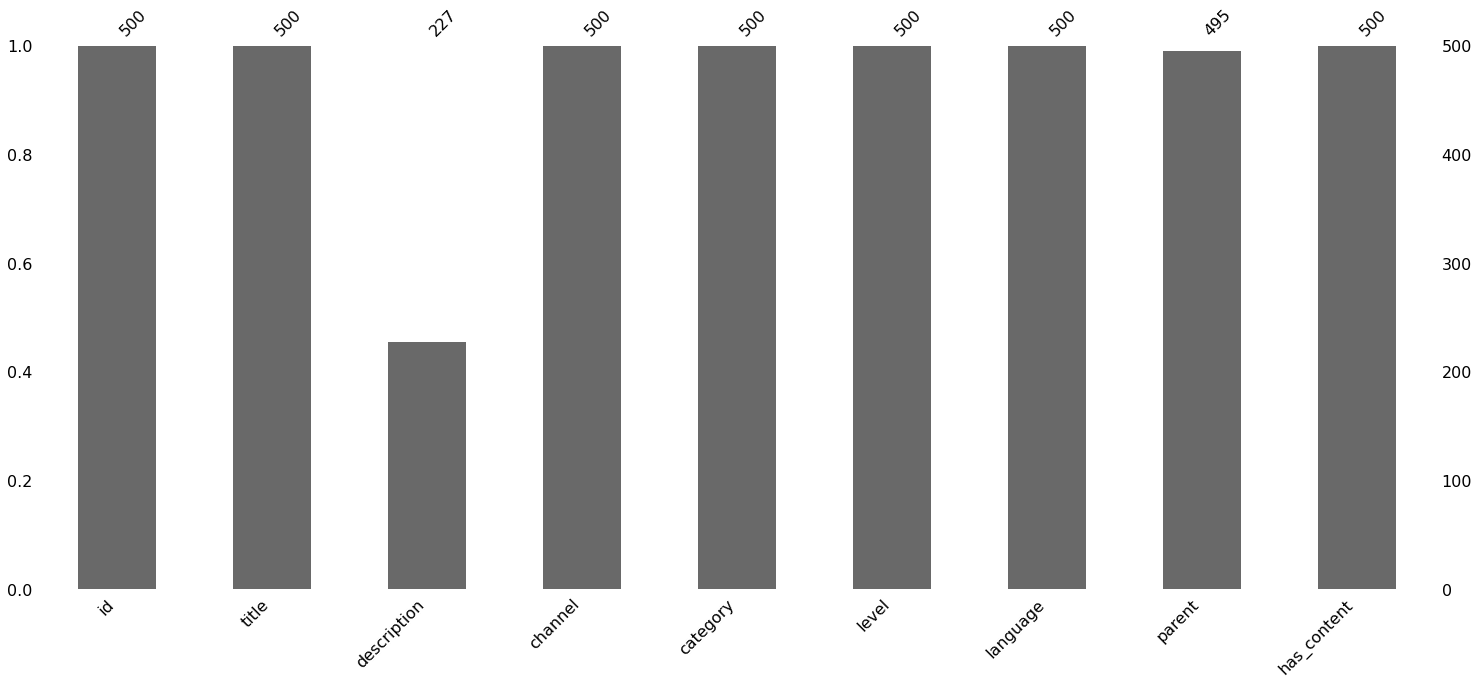

In [24]:
msno.bar(topics_df.sample(500))

- For `topic` data, `channel`, `category`,`level`,`language` and `has_content` are categorical columns hence can be used in the classification model 
- `title` and `description` will be added to an NLP model that we will build after the clasification model

### Value counts

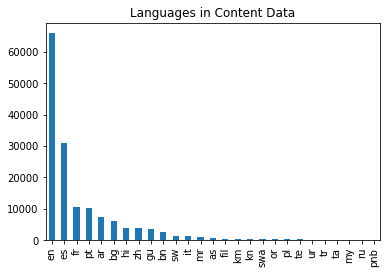

In [25]:
language_counts_content = content_df.language.value_counts()
language_counts_content.plot(kind="bar", title="Languages in Content Data")

English is the predominant language in the data. As a result we have an option to use English based NLP models. However for better performance,we might need a multilanguage NLP model

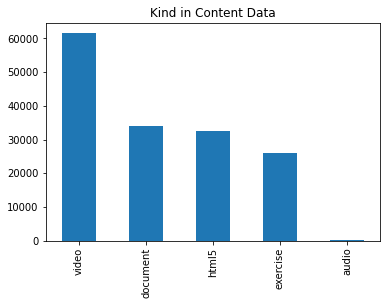

In [51]:
kind_counts_content = content_df.kind.value_counts()
kind_counts_content.plot(kind="bar", title="Kind in Content Data")

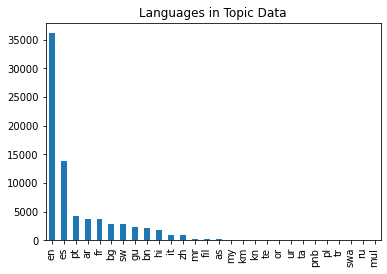

In [52]:
language_counts_topic = topics_df.language.value_counts()
language_counts_topic.plot(kind="bar", title="Languages in Topic Data")

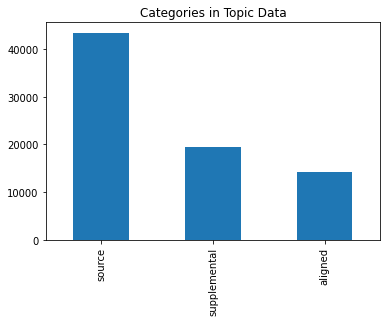

In [53]:
category_counts_topic = topics_df.category.value_counts()
category_counts_topic.plot(kind="bar", title="Categories in Topic Data")

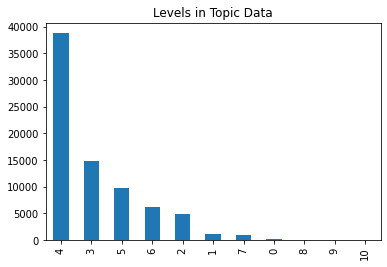

In [54]:
level_counts_topic = topics_df.level.value_counts()
level_counts_topic.plot(kind="bar", title="Levels in Topic Data")

In [55]:
# Top 5 most frequent channels/topic trees
channel_counts_topic = topics_df.channel.value_counts()
channel_counts_topic.sort_values(ascending=False).head(5)

fef095    5770
0ec697    5355
6e90a7    4554
2ee29d    4438
36a98b    3667
Name: channel, dtype: int64

In [56]:
topics_df.has_content.value_counts()

True     61517
False    15455
Name: has_content, dtype: int64

About 20% of the provided topics do not have any content

In [57]:
content_kinds = content_df.pivot(columns="kind", values=["id"])
content_kinds.head(3)

id                                        
kind audio document exercise html5           video
0      NaN      NaN      NaN   NaN  c_00002381196d
1      NaN      NaN      NaN   NaN  c_000087304a9e
2      NaN      NaN      NaN   NaN  c_0000ad142ddb

## Feature Selection

Currently the independent variable, `X` only consists of the `content_id`. In this section, we are going to append features to X from the several available data (`content_df` and `topics_df`).

The dependent variable `y` just consists of the corresponding `topic_id`

In [58]:
X[0:5]

array([['c_1108dd0c7a5d'],
       ['c_376c5a8eb028'],
       ['c_5bc0e1e2cba0'],
       ['c_76231f9d0b5e'],
       ['c_639ea2ef9c95']], dtype='<U21')

In [59]:
y[0:5]

array([['t_00004da3a1b2'],
       ['t_00004da3a1b2'],
       ['t_00004da3a1b2'],
       ['t_00004da3a1b2'],
       ['t_00068291e9a4']], dtype='<U21')

Only about 80% of the `topic_ids` have corresponding content

In [60]:
topics_with_content_df=topics_df[topics_df.has_content]
topics_with_content_df.head(3)

,id,title,description,channel,category,level,language,parent,has_content
0,t_00004da3a1b2,Откриването на резисторите,"Изследване на материали, които предизвикват на...",000cf7,source,4,bg,t_16e29365b50d,True
2,t_00068291e9a4,Entradas e saídas de uma função,Entenda um pouco mais sobre funções.,8e286a,source,4,pt,t_d14b6c2a2b70,True
3,t_00069b63a70a,Transcripts,NaN,6e3ba4,source,3,en,t_4054df11a74e,True


In [62]:
content_df[content_df.id=="c_1108dd0c7a5d"]

,id,title,description,kind,text,language,copyright_holder,license
10216,c_1108dd0c7a5d,Молив като резистор,"Моливът причинява промяна в отклонението, подо...",video,NaN,bg,NaN,NaN


In [63]:
"""
Add features
"""
new_X = np.array([['placeholder', 'placeholder', 'placeholder', 'placeholder', '4', 'place','place']])
i = 0
while i<len(X):
  #data_row = ['c_1108dd0c7a5d']
  data_row=X[i]
  content_id = data_row[0]
  topic_id = y[i][0]

  topic_data = topics_with_content_df[topics_with_content_df.id==topic_id]
  #Add topic_language
  data_row = np.append(data_row, topic_data.language.values[0])
  #Add topic_category
  data_row = np.append(data_row, topic_data.category.values[0])
  #Add topic_channel
  data_row = np.append(data_row, topic_data.channel.values[0])
  #Add topic_level
  data_row = np.append(data_row, topic_data.level.values[0])

  content_data = content_df[content_df.id==content_id]
  #Add content language
  data_row = np.append(data_row, content_data.language.values[0])
  #Add content kind
  data_row = np.append(data_row, content_data.kind.values[0])

  # data_row = ['c_1108dd0c7a5d' 'bg' 'source' '000cf7' '4' 'bg' 'video']
  new_X = np.append(new_X,np.array([data_row]),axis=0)
  i+=1
new_X = new_X[1:]  #Remove the first element we added when creating array

In [64]:
new_X[0:3]

array([['c_1108dd0c7a5d', 'bg', 'source', '000cf7', '4', 'bg', 'video'],
       ['c_376c5a8eb028', 'bg', 'source', '000cf7', '4', 'bg', 'video'],
       ['c_5bc0e1e2cba0', 'bg', 'source', '000cf7', '4', 'bg', 'video']],
      dtype='<U21')

In [65]:
len(new_X)

4526

In [66]:
y[0:3]

array([['t_00004da3a1b2'],
       ['t_00004da3a1b2'],
       ['t_00004da3a1b2']], dtype='<U21')

## Encoding the dataset with `LabelEncoder`

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
# Language Encoder
language_encoder = LabelEncoder()
language_encoder.fit(np.asarray(content_df.language))
list(language_encoder.classes_)[0:5]

['ar', 'as', 'bg', 'bn', 'en']

In [69]:
# topic_category Encoder
category_encoder = LabelEncoder()
category_encoder.fit(np.asarray(topics_df.category))
list(category_encoder.classes_)

['aligned', 'source', 'supplemental']

In [70]:
# topic_channel Encoder
channel_encoder = LabelEncoder()
channel_encoder.fit(np.asarray(topics_df.channel))
list(channel_encoder.classes_)[0:5]

['000cf7', '00a2b4', '00fda4', '01133c', '018d08']

In [71]:
# content_kind Encoder
kind_encoder = LabelEncoder()
kind_encoder.fit(np.asarray(content_df.kind))
list(kind_encoder.classes_)

['audio', 'document', 'exercise', 'html5', 'video']

In [72]:
# content_id Encoder
id_encoder = LabelEncoder()
id_encoder.fit(np.asarray(content_df.id))
list(kind_encoder.classes_)[0:4]

['audio', 'document', 'exercise', 'html5']

In [73]:
new_X[0:5]

array([['c_1108dd0c7a5d', 'bg', 'source', '000cf7', '4', 'bg', 'video'],
       ['c_376c5a8eb028', 'bg', 'source', '000cf7', '4', 'bg', 'video'],
       ['c_5bc0e1e2cba0', 'bg', 'source', '000cf7', '4', 'bg', 'video'],
       ['c_76231f9d0b5e', 'bg', 'source', '000cf7', '4', 'bg', 'video'],
       ['c_639ea2ef9c95', 'pt', 'source', '8e286a', '4', 'pt',
        'exercise']], dtype='<U21')

In [ ]:
'''
DON"T RUN - too long
Kept incase I need similar code in the future
'''
# Encode the whole of X
encoded_X = np.array([['placeholder', 'placeholder', 'placeholder', 'placeholder', '4', 'place','place']])
for row in new_X:
  data_row = row.copy()
  #Encode the topic language
  encoded_topic_language = language_encoder.transform([data_row[1]])
  data_row[1] = encoded_topic_language[0]
  #Encode the topic category
  encoded_topic_category = category_encoder.transform([data_row[2]])
  data_row[2] = encoded_topic_category[0]
  #Encode the topic channel
  encoded_topic_channel = channel_encoder.transform([data_row[3]])
  data_row[3] = encoded_topic_channel[0]
  #Encode the content language
  encoded_content_language = language_encoder.transform([data_row[5]])
  data_row[5] = encoded_content_language[0]
  #Encode the content kind
  encoded_content_kind = kind_encoder.transform([data_row[6]])
  data_row[6] = encoded_content_kind[0]
  #Encode the content ids
  encoded_content_id = id_encoder.transform([data_row[0]])
  data_row[0] = encoded_content_id[0]
  encoded_X = np.append(encoded_X,np.array([data_row]),axis=0)
encoded_X = encoded_X[1:]

In [ ]:
encoded_X[0:5]

array([['10216', '2', '1', '0', '4', '2', '4'],
       ['33412', '2', '1', '0', '4', '2', '4'],
       ['55283', '2', '1', '0', '4', '2', '4'],
       ['70957', '2', '1', '0', '4', '2', '4'],
       ['59982', '18', '1', '98', '4', '18', '2']], dtype='<U21')

In [ ]:
#y(topic id) encoder
# content_id Encoder
y_encoder = LabelEncoder()
y_encoder.fit(np.asarray(topics_df.id))
list(y_encoder.classes_)[0:4]

['t_00004da3a1b2', 't_000095e03056', 't_00068291e9a4', 't_00069b63a70a']

In [ ]:
y[0:5]

array([['t_00004da3a1b2'],
       ['t_00004da3a1b2'],
       ['t_00004da3a1b2'],
       ['t_00004da3a1b2'],
       ['t_00068291e9a4']], dtype='<U21')

In [ ]:
"""DON'T RUN"""
#Encode the whole of y
encoded_y = np.array([['placeholder']])
for row in y:
  data_row = row.copy()
  #Encode y
  encoded_topic_id = y_encoder.transform([data_row[0]])
  data_row[0] = encoded_topic_id[0] 
  encoded_y = np.append(encoded_y,np.array([data_row]),axis=0)

array([['0'],
       ['0'],
       ['0'],
       ['0'],
       ['2']], dtype='<U21')

In [ ]:
encoded_y = encoded_y[1:] 
encoded_y[0:5]

array([['0'],
       ['0'],
       ['0'],
       ['0'],
       ['2']], dtype='<U21')

## Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(encoded_X,encoded_y,test_size=1/5,random_state=0)

In [ ]:
print(f"Sample training data X:\n {X_train[0:5]}")
print(f"Sample training data y:\n {y_train[0:5]}")

Sample training data X:
 [['71890' '0' '1' '51' '1' '0' '4']
 ['27531' '18' '2' '130' '2' '18' '3']
 ['68687' '3' '1' '149' '4' '3' '4']
 ['22415' '0' '1' '51' '1' '0' '4']
 ['86505' '13' '1' '29' '5' '13' '3']]
Sample training data y:
 [['878']
 ['170']
 ['1230']
 ['878']
 ['590']]


# Model to develop

The model we create is supposed to use the dataset of K-12 educational materials described earlier to predict which content items are best aligned to a given topic in a topic tree, with the goal of matching the selections made by curriculum experts and other users of the Kolibri Studio platform.

For each topic_id in the test set, we predict a space-delimited list of recommended content_ids for that topic. File should contain header and have following format:


```
topic_id,content_ids
t_00004da3a1b2,c_1108dd0c7a5d c_376c5a8eb028 c_5bc0e1e2cba0 c_76231f9d0b5e
t_00068291e9a4,c_639ea2ef9c95 c_89ce9367be10 c_ac1672cdcd2c c_ebb7fdf10a7e
t_00069b63a70a,c_11a1dc0bfb99
...
```



# Logistic regression Classification Model (DONT RUN)

### Train and test

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
"""
DON'T RUN
"""
import matplotlib.pyplot as plt
lr = LogisticRegression(penalty='l2', C=.1, multi_class='multinomial')
lr_error_rate = [] 
trials = 10

train_percent = np.linspace(.1,.9,num=9)

from tqdm import tqdm
for p in tqdm(train_percent):
    errs = []
    for trial in np.arange(trials):
        X_train, X_test, y_train, y_test = train_test_split(encoded_X, encoded_y, train_size=p)
        lr.fit(X_train, y_train)
        err = np.mean(lr.predict(X_test) != y_test)
        errs.append(err)
    this_err = np.mean(errs)
    lr_error_rate.append(this_err)
plt.plot(train_percent, lr_error_rate)
plt.xlabel('train percent')
_ = plt.ylabel('error')

In [ ]:
lr = LogisticRegression(penalty='l2', C=.1, multi_class='multinomial')
lr_error_rate = [] 
trials2 = 100

errs2 = []
for trial in np.arange(trials):
  lr.fit(X_train, y_train)
  err = np.mean(lr.predict(X_test) != y_test)
  errs2.append(err)
error = np.mean(errs2)

In [ ]:
print(f"Error:{error}")

Error:0.9669605134277737


### Logistic Regression Classification Discussion

After doing one run of training the logistic regression model, I've realized my design approach is very wrong. Using an id as a feature is not the right approach since it is a unique identifier for the specific data point that doesn't have generalizable information for the whole model.

In addition to that, while using the `LabelEncoder` maps each of the unique values to an integer, it provides a false relationship. For example 2 > 1 which might map to `en` > `es` which is neither true nor useful.

Going forward, I'm dropping the classification model entirely and starting work on a Natural Language Processing Model. I'm thinking of including the categorical columns in the NLP data so that any of their relationship is included. 

After creating a good NLP model, the current plan is to feed it to a recommender model. I plan on using [Surprise](https://surpriselib.com/) mainly because I've successfully used it in the past but I'll explore other options and deep-learning since we have a lot of data

# NLP model for Curriculum Recommendation

Looking at our data again, we want to be able to take a single content source and decide which topic it belongs to. Our `content` data contains these text columns: `title`, `description`,`text content`,`copyright holder` and `license`. As we saw in the data visualization section, these columns apart from the `title` only exist about 50% of the time. In addition to the text columns, we have `language` and `kind` as categorical columns

The `topic` data on the other hand has these text columns:  `title` and `description`. Its categorial columns include `channel`, `category`,`language` and `level`.

An approach, we can use is building a text classification program to create a relationship between the text columns. We can then use the categorical columns to improve the classification model

## Updated Feature Selection 

In [74]:
X[0:5]

array([['c_1108dd0c7a5d'],
       ['c_376c5a8eb028'],
       ['c_5bc0e1e2cba0'],
       ['c_76231f9d0b5e'],
       ['c_639ea2ef9c95']], dtype='<U21')

In [75]:
y[0:5]

array([['t_00004da3a1b2'],
       ['t_00004da3a1b2'],
       ['t_00004da3a1b2'],
       ['t_00004da3a1b2'],
       ['t_00068291e9a4']], dtype='<U21')

In [76]:
content_df[content_df.id=="c_1108dd0c7a5d"]

,id,title,description,kind,text,language,copyright_holder,license
10216,c_1108dd0c7a5d,Молив като резистор,"Моливът причинява промяна в отклонението, подо...",video,NaN,bg,NaN,NaN


In [77]:
"""
Add text features to the X array
"""
nlp_X = np.array([['placeholder', 'placeholder', 'placeholder', 'placeholder', '4', 'place','place']])
i = 0
while i<len(X[0:1000]):
  data_row=X[i].copy()
  content_id = X[i][0]

  content_data = content_df[content_df.id==content_id]
  # We dont want ids in test and train data, so remove 1st element of array 
  data_row[0] = content_data.title.values[0]
  #Add content desc
  data_row = np.append(data_row, content_data.description.values[0])
  #Add content language
  data_row = np.append(data_row, content_data.language.values[0])
  #Add content kind
  data_row = np.append(data_row, content_data.kind.values[0])
  #Add content text content
  data_row = np.append(data_row, content_data.text.values[0])
  #Add content copyright holder
  data_row = np.append(data_row, content_data.copyright_holder.values[0])
  #Add content license
  data_row = np.append(data_row, content_data.license.values[0])

  nlp_X = np.append(nlp_X,np.array([data_row]),axis=0)
  i+=1
nlp_X = nlp_X[1:]  #Remove the first element we added when creating array
nlp_X

array([['Молив като резистор',
        'Моливът причинява промяна в отклонението, подобно на ефекта при свързването на\nелектромагнит. Защо?\n\n',
        'bg', ..., 'nan', 'nan', 'nan'],
       ['Да чуем променливото ',
        'Тук чертаем линия на лист хартия и я използваме като променлив резистор,\nпоследователно свързан с високоговорител. Каква взаимовръзка чуваме? Звучи ли\nда е линейна?\n\n',
        'bg', ..., 'nan', 'nan', 'nan'],
       ['Променлив резистор (р',
        'Използваме сърцевината на молива (неговия графит), за да приложим различни\n„дължини молив“ към веригата. Каква взаимовръзка наблюдаваш между дължината на\nграфита и ъгъла на отклонение?\n\n',
        'bg', ..., 'nan', 'nan', 'nan'],
       ...,
       ["Règle de l'Hospital\xa0(",
        'La limite en 0 de (2sinx-sin2x)/(x-sinx).\n\n', 'fr', ...,
        'nan', 'nan', 'nan'],
       ['Règle de l’Hospital  ',
        "Déterminer les limites de fonctions exponentielles en utilisant la règle de l’Hospital ou l'

In [78]:
topics_with_content_df[topics_with_content_df.id=='t_00004da3a1b2']

,id,title,description,channel,category,level,language,parent,has_content
0,t_00004da3a1b2,Откриването на резисторите,"Изследване на материали, които предизвикват на...",000cf7,source,4,bg,t_16e29365b50d,True


In [79]:
"""
Add text features to the y array
"""
nlp_y = np.array([['placeholder', 'placeholder', 'placeholder', 'placeholder', '4', 'place']])
i = 0
while i<len(y[0:1000]):
  data_row=y[i].copy()
  topic_id = y[i][0]
  topic_data = topics_with_content_df[topics_with_content_df.id==topic_id]   

  # We dont want ids in test and train data, so remove 1st element of array 
  data_row[0] = topics_with_content_df.title.values[0]
  #Add topic desc
  data_row = np.append(data_row, topics_with_content_df.description.values[0])
  #Add topic language
  data_row = np.append(data_row, topics_with_content_df.language.values[0])
  #Add topic_category
  data_row = np.append(data_row, topic_data.category.values[0])
  #Add topic_channel
  data_row = np.append(data_row, topic_data.channel.values[0])
  #Add topic_level
  data_row = np.append(data_row, topic_data.level.values[0])

  nlp_y = np.append(nlp_y,np.array([data_row]),axis=0) 
  i+=1
nlp_y = nlp_y[1:]  #Remove the first element we added when creating array
nlp_y [0:3]

array([['Откриването на резист',
        'Изследване на материали, които предизвикват намаление в отклонението, когато се свържат последователно с нашия измервателен уред. ',
        'bg', 'source', '000cf7', '4'],
       ['Откриването на резист',
        'Изследване на материали, които предизвикват намаление в отклонението, когато се свържат последователно с нашия измервателен уред. ',
        'bg', 'source', '000cf7', '4'],
       ['Откриването на резист',
        'Изследване на материали, които предизвикват намаление в отклонението, когато се свържат последователно с нашия измервателен уред. ',
        'bg', 'source', '000cf7', '4']], dtype='<U130')

In [80]:
len(nlp_X)

1000

In [81]:
len(nlp_y)

1000

## Splitting dataset for NLP

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(nlp_X,nlp_y,test_size=1/5,random_state=0)
print(f"Sample training data X:\n {X_train[0:3]}")
print(f"Sample training data y:\n {y_train[0:3]}")

Sample training data X:
 [['Soluções de inequaçõe'
  'Considerando o gráfico de uma inequação linear com duas variáveis, verifique se um determinado par de valores é uma solução da inequação.'
  'pt' 'exercise' 'nan' 'nan' 'nan']
 ['Amas, vide, sommet, &'
  'Entraînez-vous à utiliser un nouveau vocabulaire pour décrire un diagramme de distribution.'
  'fr' 'exercise' 'nan' 'nan' 'nan']
 ['मीट्रिक सिस्टम(मापन प'
  'सैल बात करते हैं आयतन या क्षमता की मापन की इकाइयों के बारे में जैसे की\nमिलीलीटर और लीटर|\n\n'
  'hi' 'video' 'nan' 'nan' 'nan']]
Sample training data y:
 [['Откриването на резист'
  'Изследване на материали, които предизвикват намаление в отклонението, когато се свържат последователно с нашия измервателен уред. '
  'bg' 'source' 'f9b74f' '4']
 ['Откриването на резист'
  'Изследване на материали, които предизвикват намаление в отклонението, когато се свържат последователно с нашия измервателен уред. '
  'bg' 'source' 'c152d6' '4']
 ['Откриването на резист'
  'Изследване на ма

## Extracting features from text files

Next step, we extract the feature vectors from the raw text following the example in references [3]. We will use `sklearn`'s `CountVectorizer`.

In [83]:
len(nlp_X.flatten())

7000

In [84]:
#create feature vectors 
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer 
cv = CountVectorizer() 
tfidf = TfidfTransformer()
vectorized_X_train = cv.fit_transform(X_train.flatten())
vectorized_y_train = cv.fit_transform(y_train.flatten())
vectorized_X_test = cv.fit_transform(X_test.flatten())
vectorized_y_test = cv.fit_transform(y_test.flatten())

In [69]:
vectorized_X_train.shape

(5600, 23838)

# Example NLP Model using `sklearn` dataset (ELEC 400M Final Report)

Before continuing working on our NLP model, we will work on a different end to end machine learning project using data that is already built into `sklearn`. The lessons learnt from building a project of lesser scope and complexity will be useful in the larger curriculum recommender project

This is a supervised learning problem. The machine learning general task here is *multi-class classification* (more specifically *a natural language processing classifier*). 

This is when we have a training dataset

> \begin{equation*}
  D =  {(x1,y1),(x2,y2),...,(xn,yn)}
\end{equation*}

trains a model to give us the target \begin{equation}
y
\end{equation}
which can be one of *K* different values. If *K*=2 such as in positive or negative sentiment analysis, it is referred to as binary classification.
>\begin{equation}
Y = {y1,y2,..,yk}
\end{equation}

## Relevant applications of NLP classifiers

Natural Language Processing (NLP) Classifiers are widely used in several industries. Some of these include: 

- Spam detection in emails

- Sentiment analysis in social media

- Topic detection in chatbots

The input, *x* for NLP classifiers is sequences of words. The dimensionality of this input is large and linearly proportional to the vocabulary size

The most popular algorithm in NLP classifiers is The Bag of Words and we will be using the same here. This algorithm represents raw text data as a bag or multiset of words where the frequency of occurrence of each word is used as a feature vector for training the model [5] 

Most popular methods of implementing NLP classifiers at the moment is using `Naive bayes`, `Support Vector Machines` and `Deep Learning`. We will be building a `Naive bayes` model and `SVM` model in this project

## Dataset

The dataset we will be using is the 20 Newsgroups text dataset collected by Ken Lang [6]. This dataset is a collection about 18000 newsgroups posts on 20 topics split into a training dataset and a testing dataset. It is the most popular dataset for text classification and text clustering 


## Exploratory Data Analysis

`sklearn` comes with a loader that enables us to obtain the raw text data. Although, another loader exist for pre-processed data in form of feature vectors, we will not be using it for the learning experience.

Also, using the raw text data will allow us to have access to custom parameters that we can fine-tune to improve performance

In [2]:
from sklearn.datasets import fetch_20newsgroups 
newsgroups_train = fetch_20newsgroups(subset="train",shuffle=True)

The dataset consists of 20 files for each topic

In [3]:
newsgroups_train.filenames[0:5]

array(['/root/scikit_learn_data/20news_home/20news-bydate-train/rec.autos/102994',
       '/root/scikit_learn_data/20news_home/20news-bydate-train/comp.sys.mac.hardware/51861',
       '/root/scikit_learn_data/20news_home/20news-bydate-train/comp.sys.mac.hardware/51879',
       '/root/scikit_learn_data/20news_home/20news-bydate-train/comp.graphics/38242',
       '/root/scikit_learn_data/20news_home/20news-bydate-train/sci.space/60880'],
      dtype='<U86')

In [5]:
print(newsgroups_train.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







As you can see above, each post in the data consists of several sections. This is listed below:
- `From`
- `Subject`
- `Nntp-Posting-Host`
- `Organization`
- `nLines`
- The rest of content of the post follows

In [6]:
print(newsgroups_train.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


There are 20 different categories (referred to as `newsgroups` as shown above

In [7]:
newsgroups_train.filenames.shape

(11314,)

In [8]:
newsgroups_train.target.shape

(11314,)

### Data preprocessing - 20 Newsgroups feature selection

The input consists of sequences of words that are of varying length. Before we can use this raw text data, we need to first convert it into *d* dimensional numerical vectors. This will allow it to be fed into a machine learning algorithm since computers cannot understand text



One method to do this is using the `Bag of Words` model mentioned earlier. First we represent all words in the vocabulary of the training set as shown below
>\begin{equation}
V = {motoring, mohan,mongoose,atheism ...}
\end{equation}

We use the `Term Frequency times Inverse Document Frequency` (TFIDF) vectorizer from `sklearn` to create the vectors

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer 
tfid_vectorizer = TfidfVectorizer()
tfid_vectors_X = tfid_vectorizer.fit_transform(newsgroups_train.data)

In [10]:
non_zero_vectors = tfid_vectors_X.nnz/float(tfid_vectors_X.shape[0])
non_zero_vectors

157.9958458546933

There are only 157 non-zero vectors hence our data is very sparse

### Naive Bayes NLP model for 20Newsgroups Data



There are two types of classification models: generative and disciminative models. A discriminatuve model would not be suitable for text classification like our problem since the data does not follow a normal distribution. It follows a discrete multinomial distribution

 Naive Bayes is a generative classification model. This is because it specifies a hypothetical random process to generate data. It uses the Bayes rule shown below  

>\begin{equation}
arg\:max_{y}\:log\:p\:(y|x) = arg\:max_{y}\:log\:\frac{p\:(x|y)\:p(y)} {p(x)} = arg\:max_{y}\:log\:p\:(x|y)\:p(y)
\end{equation}

Naive Bayes models are usually suitable for high dimensional data like ours.

There are several types of naive bayes models such as Gaussian Naive Bayes and Multinomial Naive Bayes. The difference is in the assumptions they make about data. For this project, the most suitable is Multinomial Naive Bayes which assumes the features are in a multinomial distribution. It describes probabilities of observing counts among a number of categories hence it is perfect for data with count rates like ours[10]. As described above, we pre-process the data to have words represented by their frequency in the raw data.

In [11]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB(alpha=0.01) 
nb_model = nb_model.fit(tfid_vectors_X,newsgroups_train.target)

In [12]:
# Load the test data
news_groups_test = fetch_20newsgroups(subset="test")
tfid_vectors_y = tfid_vectorizer.transform(news_groups_test.data)

In [13]:
nb_preds = nb_model.predict(tfid_vectors_y)

In [14]:
import numpy as np
np.mean(nb_preds==news_groups_test.target)

0.8352363250132767

In [15]:
from sklearn import metrics 
metrics.f1_score(news_groups_test.target,nb_preds,average="macro")

0.8290659644474043

In [16]:
#Implement this function following example in the sklearn documents, references [4]
def top_5_features(classifier,vectorizer):
  feature_names = np.asarray(vectorizer.get_feature_names())
  top_5 = np.argsort(classifier.coef_)[-5:]
  print(feature_names[top_5])

In [17]:
top_5_features(nb_model,tfid_vectorizer)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


[['hzrck' 'motoring' 'motoren' ... 'to' 'of' 'the']
 ['hzrck' 'mohan' 'mohammedans' ... 'of' 'to' 'the']
 ['hzrck' 'mongoose' 'mongers' ... 'to' 'of' 'the']
 ['hzrck' 'mouting' 'mouths' ... 'of' 'to' 'the']
 ['hzrck' 'mrlhzv' 'mrlhzrchzv' ... 'to' 'of' 'the']]


In [18]:
from sklearn.metrics import classification_report
print(classification_report(news_groups_test.target, nb_preds))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       319
           1       0.69      0.75      0.72       389
           2       0.74      0.63      0.68       394
           3       0.65      0.75      0.69       392
           4       0.83      0.84      0.83       385
           5       0.84      0.78      0.81       395
           6       0.82      0.78      0.80       390
           7       0.89      0.90      0.90       396
           8       0.93      0.96      0.95       398
           9       0.95      0.94      0.95       397
          10       0.95      0.97      0.96       399
          11       0.89      0.93      0.91       396
          12       0.79      0.77      0.78       393
          13       0.89      0.84      0.86       396
          14       0.87      0.91      0.89       394
          15       0.82      0.95      0.88       398
          16       0.76      0.91      0.83       364
          17       0.97    

Generative models like Naive-Bayes make stronger modelling assumptions which affect how the model performs. If the assumptions are correct, then their performance is better

### Support Vector Machine Classifier for 20Newsgroups Data

Support vector machines are suitable for a project like this because they work well with high-dimensional data like ours. This is because they are only affected by points close to the margins

In [16]:
from sklearn.svm import SVC 
svc_model = SVC(kernel="linear",C=1e10)
svc_model.fit(tfid_vectors_X,newsgroups_train.target)

SVC(C=10000000000.0, kernel='linear')

Using the SVC model takes relatively longer time to train (4 minutes). This is because SVC models scale with number of samples  $\mathcal{O}[N^2]$  and since our data has numerous samples (~20k), it requires a lot of computational resources [9]

We can improve this by using a stochastic gradient descent classifier to implement a linear SVM. This lowers the runtime to ~2 seconds

### Stochastic Gradient Descent Classifier for 20Newsgroups Data - SVM

Stochastic Gradient Descent model on `sklearn` implements linear classifiers such as SVM and logistic regression with stochastic gradient desent. The `sklearn` model works best with sparse data. As we saw above, the data we're using is sparse making this a suitable model

We choose `hinge` loss so that the model implements a linear SVM

In [19]:
from sklearn.linear_model import SGDClassifier 
svm_model  = SGDClassifier(loss="hinge",penalty="l2",alpha=0.001,random_state=95)
svm_model.fit(tfid_vectors_X,newsgroups_train.target)

SGDClassifier(alpha=0.001, random_state=95)

In [20]:
svm_preds = svm_model.predict(tfid_vectors_y)

In [21]:
np.mean(svm_preds==news_groups_test.target)

0.8235528412108338

In [22]:
metrics.f1_score(news_groups_test.target,svm_preds,average="macro")

0.8101986195933588

In [23]:
top_5_features(svm_model,tfid_vectorizer)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[['atheism' 'nntp' 'host' ... 'christians' 'church' 'god']
 ['sandvik' 'clipper' 'encryption' ... 'firearms' 'guns' 'gun']
 ['god' 'jesus' 'christ' ... 'turkish' 'israeli' 'israel']
 ['gun' 'clipper' 'guns' ... 'kaldis' 'optilink' 'cramer']
 ['rutgers' 'keith' 'atheists' ... 'ch981' 'rosicrucian' 'sandvik']]


In [24]:
print(classification_report(news_groups_test.target, svm_preds))

              precision    recall  f1-score   support

           0       0.73      0.70      0.72       319
           1       0.80      0.70      0.75       389
           2       0.71      0.78      0.74       394
           3       0.74      0.67      0.70       392
           4       0.82      0.83      0.82       385
           5       0.84      0.76      0.80       395
           6       0.83      0.90      0.87       390
           7       0.91      0.89      0.90       396
           8       0.93      0.97      0.95       398
           9       0.89      0.89      0.89       397
          10       0.87      0.99      0.93       399
          11       0.83      0.96      0.89       396
          12       0.83      0.62      0.71       393
          13       0.88      0.85      0.87       396
          14       0.84      0.96      0.90       394
          15       0.74      0.94      0.83       398
          16       0.70      0.92      0.79       364
          17       0.91    

## Hyper Parameter Tuning



### Naive Bayes Grid Search - 5 Fold Cross Validation

We can use the grid search tool from `sklearn` to tune the SVM and Naive Bayes parameters. By default, grid search uses 5-fold cross validation but we can specify it using `cv=<int>`

In [25]:
from sklearn.model_selection import GridSearchCV
parameters = {
    "alpha":(0.01,0.001)
}

In [26]:
grid_search_nb_clf = GridSearchCV(nb_model,parameters,n_jobs=-1)
grid_search_nb_clf.fit(tfid_vectors_X,newsgroups_train.target)

GridSearchCV(estimator=MultinomialNB(alpha=0.01), n_jobs=-1,
             param_grid={'alpha': (0.01, 0.001)})

In [27]:
grid_search_nb_clf.best_score_ #mean cross-validated score

0.911171879303898

In [28]:
grid_search_nb_clf.best_params_

{'alpha': 0.01}

Using grid search's cross validation to optimize the alpha parameter for our naive bayes classifier increases our score from 82.9% to 91.1%

### *SVM* Grid Search - 5 Fold Cross Validation

In [29]:
svm_model.get_params()

{'alpha': 0.001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': 95,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [30]:
grid_search_svm_clf = GridSearchCV(svm_model,parameters,n_jobs=-1)
grid_search_svm_clf.fit(tfid_vectors_X,newsgroups_train.target)

GridSearchCV(estimator=SGDClassifier(alpha=0.001, random_state=95), n_jobs=-1,
             param_grid={'alpha': (0.01, 0.001)})

In [31]:
grid_search_svm_clf.best_score_

0.8889869046237614

In [32]:
grid_search_svm_clf.best_params_

{'alpha': 0.001}

In [33]:
# grid_search_svm_clf.get_params()

Using grid search's cross validation  to optimize the alpha parameter for our naive bayes classifier increases our score from 81.0% to 88.9%

### Training pipeline

To be able to quickly test different versions of models, we can create a pipeline using`sklearn`'s `make_pipeline`. First, we will implemented a very simple naive bayes model with the default parameters producing a simple probabilistic model of the frequency of words

In [34]:
# References code in Python Data Science Hanbook [10]
from sklearn.pipeline import make_pipeline 
nb_pipeline_model = make_pipeline(TfidfVectorizer(), MultinomialNB())
svm_pipeline_model = make_pipeline(TfidfVectorizer(), SGDClassifier())

In [42]:
# X_train = tfid_vectors_X
X_train = newsgroups_train.data
y_train = newsgroups_train.target
nb_pipeline_model.fit(X_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [43]:
X_test = news_groups_test.data
y_test = news_groups_test.target
nb_pipeline_preds = nb_pipeline_model.predict(X_test)

In [46]:
# Build prediction function using this model [10]
def predict(string,X_train = newsgroups_train, model = nb_pipeline_model):
  prediction = model.predict([string])
  return X_train.target_names[prediction[0]]

In [57]:
predict("Canada")

'rec.sport.hockey'

## Future considerations

Some options we can do to improve the model is 
- Filtering common words such as articles 'a', 'an' and 'the'. When we looked at the `top_5_features` function, both 'to' and 'for' were in each of the top 5 so filtering them would improve performance
- Further preprocessing the data to only keep the word roots. For example, mapping both 'happily' and 'happyness' to happy [7]

## Export Notebook

In [23]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain

In [28]:
!pwd

/content


In [43]:
!cd drive/MyDrive/A_ELEC_UBC/Year4/Elec400m/'Final Report'/Code && ls

 ClassExamples	 Data  'ELEC 400M Final Report Jupyter Notebook'


In [44]:
!cp drive/MyDrive/A_ELEC_UBC/Year4/Elec400m/'Final Report'/Code/'ELEC 400M Final Report Jupyter Notebook'  ./

In [45]:
#Note that image of soma server in the background section causes an error in download,
# so comment that out first before converting to pdf
!jupyter nbconvert --to PDF "ELEC 400M Final Report Jupyter Notebook"

[NbConvertApp] Converting notebook ELEC 400M Final Report Jupyter Notebook to PDF
[NbConvertApp] Support files will be in ELEC 400M Final Report Jupyter Noteboo_files/
[NbConvertApp] Making directory ./ELEC 400M Final Report Jupyter Noteboo_files
[NbConvertApp] Making directory ./ELEC 400M Final Report Jupyter Noteboo_files
[NbConvertApp] Making directory ./ELEC 400M Final Report Jupyter Noteboo_files
[NbConvertApp] Making directory ./ELEC 400M Final Report Jupyter Noteboo_files
[NbConvertApp] Making directory ./ELEC 400M Final Report Jupyter Noteboo_files
[NbConvertApp] Making directory ./ELEC 400M Final Report Jupyter Noteboo_files
[NbConvertApp] Making directory ./ELEC 400M Final Report Jupyter Noteboo_files
[NbConvertApp] Making directory ./ELEC 400M Final Report Jupyter Noteboo_files
[NbConvertApp] Making directory ./ELEC 400M Final Report Jupyter Noteboo_files
[NbConvertApp] Writing 210112 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times:

# References 
[1] References
"Learning Equality - Curriculum Recommendations." (2022). Retrieved from https://kaggle.com/competitions/learning-equality-curriculum-recommendations

[2] References "Using Missingno to Diagnose Data Sparsity." (2022). Retrieved from https://www.kaggle.com/code/residentmario/using-missingno-to-diagnose-data-sparsity 

[3] References "Machine Learning, NLP: Text Classification using scikit-learn, python and NLTK." (2017). Retrieved from https://towardsdatascience.com/machine-learning-nlp-text-classification-using-scikit-learn-python-and-nltk-c52b92a7c73a

[4] References "The 20 newsgroups text dataset" . (2022). Retrieved from https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html 

[5] References "Bag-of-words model". (2022). Retrieved from https://en.wikipedia.org/wiki/Bag-of-words_model 

[6] References "20 Newsgroups"  http://qwone.com/~jason/20Newsgroups/ 

[7] References "Naive Baise Lecture 8 Slides". (2022). Retrieved from https://canvas.cornell.edu/files/2122690/download?download_frd=1 

[8] References "sklearn.linear_model.SGDClassifier". (2022). Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

[9] References "University of British Columbia's ELEC 400M Class Code Examples - SVM" 

[10] References "Python Data Science Handbook", Jake Vanderplas